# Create Images to Label

In [23]:
from glob import glob
import cv2
import matplotlib.pyplot as plt

In [31]:
def get_image(video_fn, frame=1500):
    cap = cv2.VideoCapture(video_fn)
    for x in range(frame):
        res, image = cap.read()
        if res == False:
            break
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return image

In [53]:
from tqdm.notebook import tqdm

In [54]:
mp4s = glob('../data/*/*.mp4')
for m in tqdm(mp4s):
    frame = 1500
    img = get_image(m)
    img_fn = m.split('/')[-1].rstrip('.mp4') + f'_frame{frame}' + '.png'
    img_fn = '../annotate/' + img_fn
    cv2.imwrite(img_fn, img)

  0%|          | 0/55 [00:00<?, ?it/s]

# Label Studio Results

In [55]:
import pandas as pd

In [198]:
import json

with open('result.json') as f:
    j = json.load(f)
    
annotations = pd.json_normalize(j['annotations'])
imgs = pd.json_normalize(j['images'])
results = annotations.merge(imgs,
                  left_on=['image_id'],
                  right_on=['id'],
                  how='left',
                  suffixes=('','_image'))
cats = pd.json_normalize(j['categories'])
results = results.merge(cats, left_on=['category_id'], right_on=['id'], how='left')
results['x'] = results['bbox'].str[0]
results['y'] = results['bbox'].str[1]
results['w'] = results['bbox'].str[2]
results['h'] = results['bbox'].str[3]
# results['png'] = results['file_name'].str.split('-').str[-1]
results['png'] = results['file_name'].str[-25:]
results= results.drop([0, 1]).reset_index(drop=True)

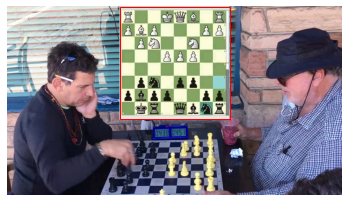

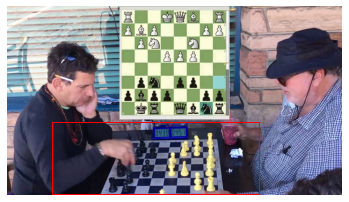

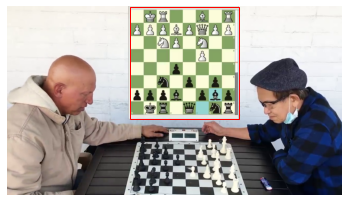

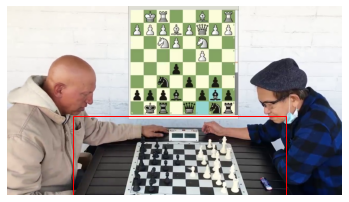

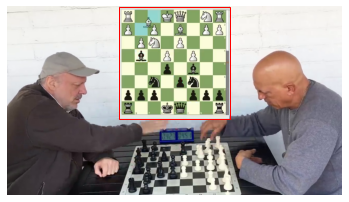

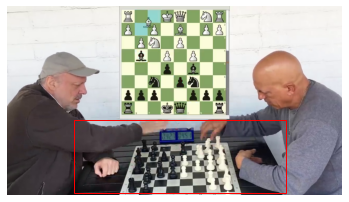

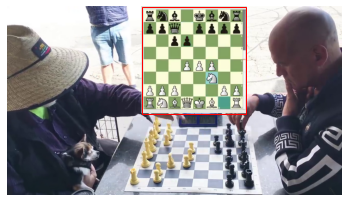

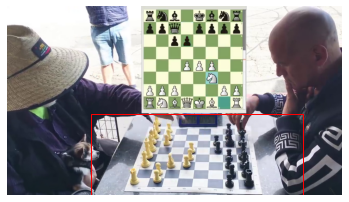

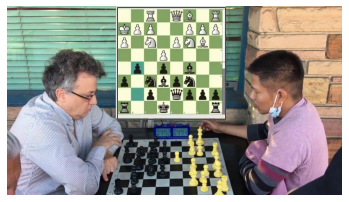

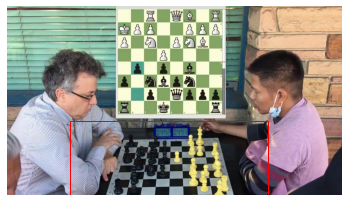

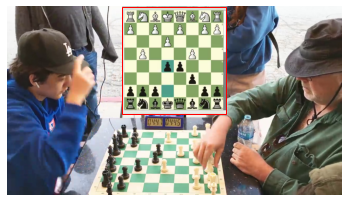

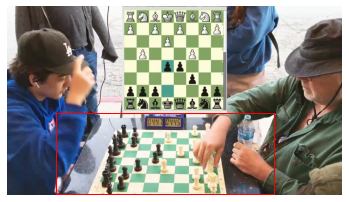

In [217]:
import matplotlib.patches as patches


for i, d in results.iterrows():
    img = plt.imread('../annotate/' + d['png'])
    myx = d['x']
    myy = d['y']
    myh = d['h']
    myw = d['w']

    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.axis('off')
    rect = patches.Rectangle((myx, myy), myw, myh, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show()

# Next Steps
- Take Annotation Results
- Run Chessboard Extractor code on all videos
- Save Reults